## The following code simulates my paper on Balancing the trade-off between grids performance enhancement and resilience to cyber threat.

The paper was presented at the resilience week 2019 conference held in San Antonio, Tx and was organized by Idaho national labs

paper link: https://www.researchgate.net/publication/334625217_Balancing_Smart_Grid's_Performance_Enhancement_and_Resilience_to_Cyber_Threat

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [2]:
# initialize the parameters
Capa = [20,80,200,500,800]
C=len(Capa)
k =0.7
lamda =1
Fi =2
Ci=1
N =118
NumberOfLines =186
N_pc_max = 118
gamma =0.05
l = N/NumberOfLines
psi = np.zeros(NumberOfLines+1)
theta = np.zeros(NumberOfLines+1)
human_error = np.zeros(NumberOfLines+1)
a1 = np.zeros(NumberOfLines+1)
a2 = np.zeros(NumberOfLines+1)
a3 = np.zeros(NumberOfLines+1)
a4 = np.zeros(NumberOfLines+1)
b=0.6
r = 0.6
e=0.1
Epsilon =np.zeros(NumberOfLines+1)
Wf=0.5
Wcmax=.5
Q = np.zeros((2*C*NumberOfLines,2*C*NumberOfLines))
deltaT =.1
human_ini = .01

In [3]:
for i in range(1,NumberOfLines+1):
    theta[i] = 1-k+(k*l*i)/N_pc_max

In [4]:
for i in range(1,NumberOfLines+1):
    psi[i] = lamda*k*(1- (math.exp(gamma*l*i)-1)/(math.exp(gamma*N_pc_max)-1))

In [5]:
for i in range(1,NumberOfLines+1):
    #human_error[i] = human_ini+((1-human_ini)*i)/NumberOfLines
    human_error[i] = 0.1*i/NumberOfLines

In [6]:
for i in range(1,NumberOfLines+1):
    a1[i] = max(0.4 - 0.25 * r - e *(0.2 - e) -  0.25 * theta[i],0.02)
    a2[i] = max(0.1- 0.05 * r - 0.1 * e*(0.2 - e) - 0.07 * theta[i],0.01)
    a3[i] = max(0.4 - 0.25 * r - e *(0.2 - e) -  0.25 * theta[i],0.02)
    a4[i] = max(0.1- 0.05 * r - 0.1 * e*(0.2 - e) - 0.07 * theta[i],0.01)  
    Epsilon[i] = max(0.01,(0.6 - 0.4* r - 0.5 * e - 0.3 * theta[i]))

In [7]:
# begin loop to calculate the transition Matrix for given parameters
for i in range(1,NumberOfLines):
    # calculate the pStop
    if i<=int(a2[i]*NumberOfLines):
        f1=Epsilon[i] + a1[i]*( (a2[i]*NumberOfLines-i)/(a2[i]*NumberOfLines) )**4
    elif i>int(a2[i]*NumberOfLines) and i<=int(b*NumberOfLines):
        f1=Epsilon[i]
    elif i>int(b*NumberOfLines):
        pstop_temp = Epsilon[i] + ( (i-b*NumberOfLines)/(NumberOfLines-b*NumberOfLines))**4
        f1=min(1,pstop_temp)
    for j in [1,2]:
        if j==1:
            for k in range (1,C+1):
                pstop_cmax = a3[i]*( (Capa[k-1]-max(Capa))/max(Capa) )**4
                f2 = max(a4[i], pstop_cmax)
                pStable = (Wf*f1+Wcmax*f2)*(1-psi[i])*(1-human_error[i])
                if pStable>1:
                    pStable ==1
               
                pCont = 1 -pStable
                Q[ 2*(i-1)*C+2*(k-1)+j, 2*(i-1)*C+2*(k-1)+j+1]=pStable
                # find the transition probabilities when there are new failures
                 #pCont probability
                if k==1:
                    pContSub=min(1,0.03+6e-7*(i+112)**3)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                if k==2:
                    pContSub=min(1,0.03+6e-7*(i+75)**3)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                if k==3:
                    pContSub=min(1,0.03+6e-7*(i+20)**3)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                if k==4:
                    pContSub=min(1,0.03+6e-7*(i-60)**3)
                    if pContSub<0.03:
                        pContSub=0.03
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                if k==5:
                    pContSub=0
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+1]= pCont*(1-pContSub)
                a=2.22
                b=1.52
                c=0.52
                d=0.03
                w=[a,b, c, d]
                if k==1:
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+3]= pContSub*pCont*w[0]/sum(w)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+5]= pContSub*pCont*w[1]/sum(w)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+7]= pContSub*pCont*w[2]/sum(w)
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+9]= pContSub*pCont*w[3]/sum(w)
                if k==2:
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+3]= pContSub*pCont*w[1]/(sum(w)-w[0])
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+5]= pContSub*pCont*w[2]/(sum(w)-w[0])
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+7]= pContSub*pCont*w[3]/(sum(w)-w[0])
                if k==3:
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+3]= pContSub*pCont*w[2]/(sum(w)-w[0]-w[1])
                    Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+5]= pContSub*pCont*w[3]/(sum(w)-w[0]-w[1])
                if k==4:
                            Q[2*(i-1)*C+2*(k-1)+1,2*i*C+2*(k-1)+3]= pContSub*pCont*1
Q[2*(NumberOfLines-1)*C+1:2*C*NumberOfLines,:]=0

In [8]:
size = 2*NumberOfLines*C
for i in range (1,size):
            Q[i,i]=-1*sum(Q[i,:])
Q=Q/deltaT;

#Analytical result

[D,V] = LA.eig(Q);
U= np.diag(V)

M=0
ii=2*C*(Fi-1)+2*Ci-1
Dist = np.zeros(NumberOfLines+2)
for j in range (0,size,2):
            if U[j].all()!=0:
                temp=V[ii,j]/U[j]
                Dist[M,]=Dist[M,]+temp;
            
            if j%(2*C)==0:
                M=M+1;
            

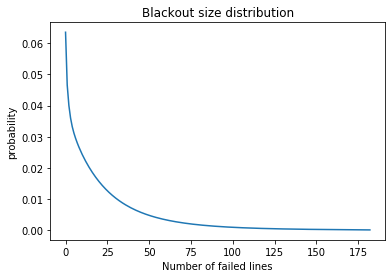

In [9]:
# plot the distribution of the blackout size

plt.plot(Dist[Fi:185]) # 'r' is the color red
plt.title('Blackout size distribution')
plt.xlabel ("Number of failed lines")
plt.ylabel('probability')
plt.show()

In [10]:
# Expected line failures
Dist1 = Dist[0:186]
numlines = np.linspace(1, 186, num=186)
ExpectedlineFailure = 0
for i in range(1,len(numlines)):
    ExpectedlineFailure = ExpectedlineFailure+Dist1[i]*numlines[i]

In [11]:
ExpectedlineFailure

28.14189172201359

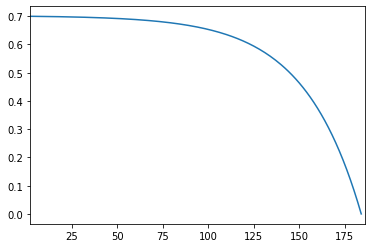

In [12]:
# plot cyber threat parameter against line failure
plt.xlim(Fi,NumberOfLines)
plt.plot(psi[Fi:NumberOfLines+1])

(2, 186)

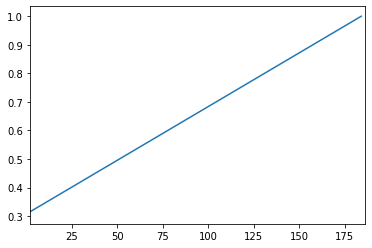

In [13]:
# plot theta against number of line failures
plt.plot(theta[Fi:NumberOfLines+1])
plt.xlim(Fi,NumberOfLines)

(2, 186)

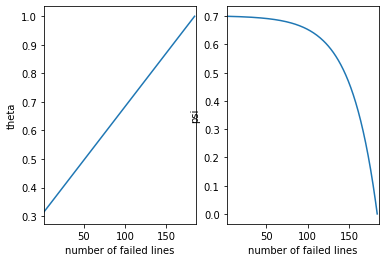

In [14]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1, )
plt.plot(theta[Fi:NumberOfLines+1]) # More on color options later
plt.xlim(Fi,NumberOfLines)
plt.xlabel('number of failed lines')
plt.ylabel('theta')
plt.subplot(1,2,2)
plt.plot(psi[Fi:NumberOfLines+1])
plt.xlabel('number of failed lines')
plt.ylabel('psi')
plt.xlim(Fi,NumberOfLines)

(2, 186)

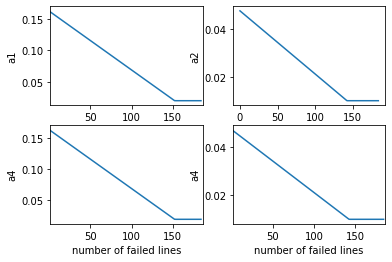

In [15]:
# plot a1,a2,a3,a4 parameters
plt.subplot(2,2,1, )
plt.plot(a1[Fi:NumberOfLines+1]) # More on color options later
plt.xlim(Fi,NumberOfLines)
plt.xlabel('number of failed lines')
plt.ylabel('a1')
plt.subplot(2,2,2)
plt.plot(a2[Fi:NumberOfLines+1])
plt.xlabel('number of failed lines')
plt.ylabel('a2')
plt.subplot(2,2,3)
plt.xlim(Fi,NumberOfLines)
plt.plot(a3[Fi:NumberOfLines+1])
plt.xlabel('number of failed lines')
plt.ylabel('a4')
plt.subplot(2,2,4)
plt.xlim(Fi,NumberOfLines)
plt.plot(a4[Fi:NumberOfLines+1])
plt.xlabel('number of failed lines')
plt.ylabel('a4')
plt.xlim(Fi,NumberOfLines)

In [16]:
df = pd.DataFrame(Q)
df.to_excel("transitionmatrix_complete_model.xlsx") 